In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("EmployeeAttritionFPD.csv")   


In [5]:
df.head()

,Age,AgeGroup,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Sex,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,25-54,Travel_Rarely,1102,Human Resources Management,1.0,2.0,Human Resources Management,2.0,Female,94,3,2,Training and Development Officer,4,Single,5993,19479,8,1,11,3,1,8,0,1,6,4,0,5,1
1,49,25-54,Travel_Frequently,279,Information Technology,8.0,1.0,Information Technology,3.0,Male,61,2,2,Programmer,2,Single,5130,24907,1,0,23,4,4,10,3,3,10,7,1,7,0
2,37,25-54,Travel_Rarely,1373,Information Technology,2.0,2.0,Information Technology,4.0,Male,92,2,1,Programmer,3,Single,2090,2396,6,1,15,3,2,7,3,3,0,0,0,0,0
3,33,25-54,Travel_Frequently,1392,Information Technology,3.0,4.0,Information Technology,4.0,Male,56,3,1,Technical Support,3,Single,2909,23159,1,1,11,3,3,8,3,3,8,7,3,0,0
4,27,25-54,Travel_Rarely,591,Information Technology,2.0,1.0,Information Technology,1.0,Male,40,3,1,Technical Support,2,Single,3468,16632,9,0,12,3,4,6,3,3,2,2,2,2,0


In [6]:
df.shape

(1470, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   AgeGroup                  1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1469 non-null   float64
 9   Sex                       1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

EnvironmentSatisfaction    1
dtype: int64

In [9]:
df = df.dropna()


In [10]:
df.isna().sum().sum()


np.int64(0)

In [11]:
df.shape


(1469, 31)

In [12]:
df.duplicated().sum()


np.int64(0)

In [13]:
nominal_cols = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "WorkLifeBalance",
    "OverTime",
    "Attrition", # target
    "AgeGroup",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Sex",
    "JobRole",
    "MaritalStatus",
    "MaritalStatus"
]

In [14]:
numerical_cols = [col for col in df.columns if col not in nominal_cols]

In [15]:
print("Nominal columns:", nominal_cols)
print("Numerical columns:", numerical_cols)

Nominal columns: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'OverTime', 'Attrition', 'AgeGroup', 'BusinessTravel', 'Department', 'EducationField', 'Sex', 'JobRole', 'MaritalStatus', 'MaritalStatus']
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
target = "Attrition"  # change this
df[target].value_counts()


Attrition
0    1233
1     236
Name: count, dtype: int64

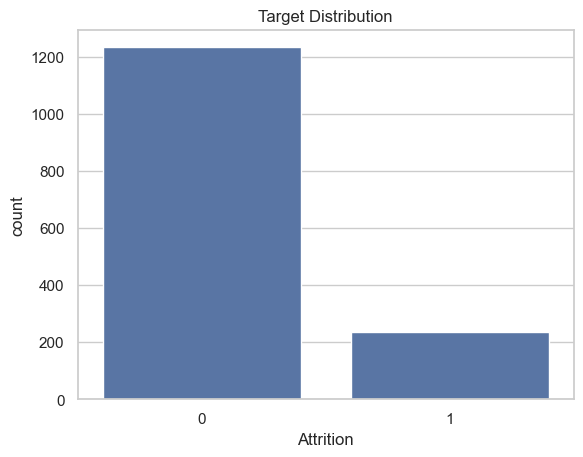

In [17]:
sns.countplot(x=target, data=df)
plt.title("Target Distribution")
plt.show()


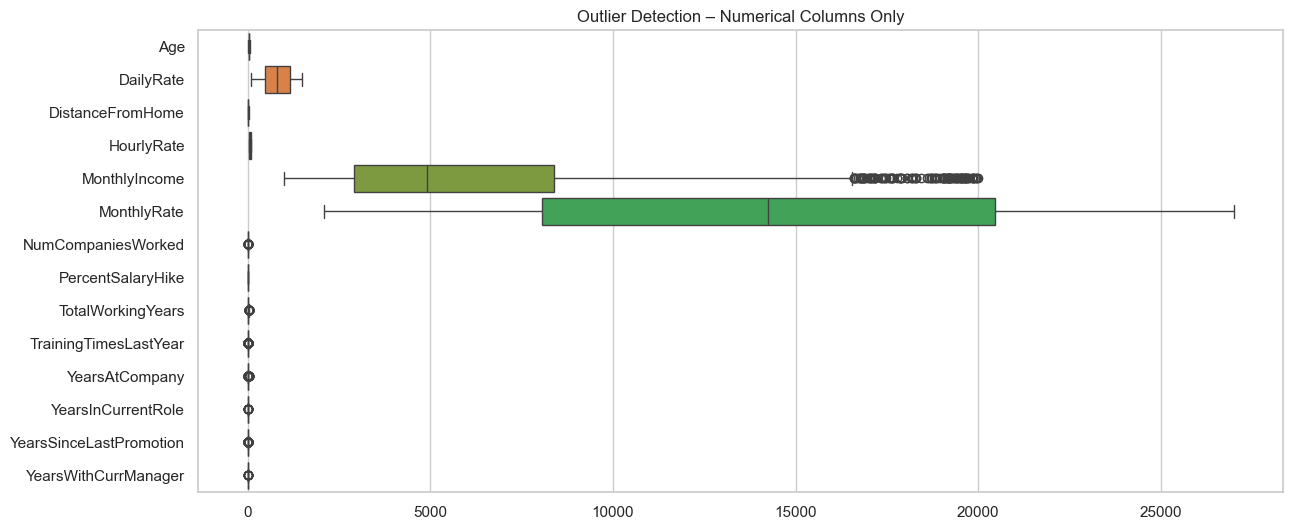

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_cols], orient="h")
plt.title("Outlier Detection – Numerical Columns Only")
plt.show()


In [19]:
outlier_results = []

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_results.append({
        "column": col,
        "num_outliers": n_outliers,
        "outlier_pct": (n_outliers / len(df)) * 100,
        "lower_bound": lower,
        "upper_bound": upper
    })

outlier_df = pd.DataFrame(outlier_results).sort_values(
    "num_outliers", ascending=False
)

outlier_df


,column,num_outliers,outlier_pct,lower_bound,upper_bound
9,TrainingTimesLastYear,238,16.201498,0.5,4.5
4,MonthlyIncome,114,7.760381,-5292.5,16583.5
12,YearsSinceLastPromotion,107,7.283867,-4.5,7.5
10,YearsAtCompany,104,7.079646,-6.0,18.0
8,TotalWorkingYears,63,4.288632,-7.5,28.5
6,NumCompaniesWorked,52,3.539823,-3.5,8.5
11,YearsInCurrentRole,21,1.429544,-5.5,14.5
13,YearsWithCurrManager,14,0.953029,-5.5,14.5
0,Age,0,0.000000,10.5,62.5
1,DailyRate,0,0.000000,-573.0,2195.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1469 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1469 non-null   int64  
 1   AgeGroup                  1469 non-null   object 
 2   BusinessTravel            1469 non-null   object 
 3   DailyRate                 1469 non-null   int64  
 4   Department                1469 non-null   object 
 5   DistanceFromHome          1469 non-null   float64
 6   Education                 1469 non-null   float64
 7   EducationField            1469 non-null   object 
 8   EnvironmentSatisfaction   1469 non-null   float64
 9   Sex                       1469 non-null   object 
 10  HourlyRate                1469 non-null   int64  
 11  JobInvolvement            1469 non-null   int64  
 12  JobLevel                  1469 non-null   int64  
 13  JobRole                   1469 non-null   object 
 14  JobSatisfacti

In [21]:
num_cols = df.select_dtypes(include=np.number)

In [22]:
(num_cols <= 0).sum()

Age                            0
DailyRate                      0
DistanceFromHome               1
Education                      0
EnvironmentSatisfaction        0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobSatisfaction                0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked           196
OverTime                    1053
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
TotalWorkingYears             11
TrainingTimesLastYear         54
WorkLifeBalance                0
YearsAtCompany                44
YearsInCurrentRole           244
YearsSinceLastPromotion      582
YearsWithCurrManager         264
Attrition                   1233
dtype: int64

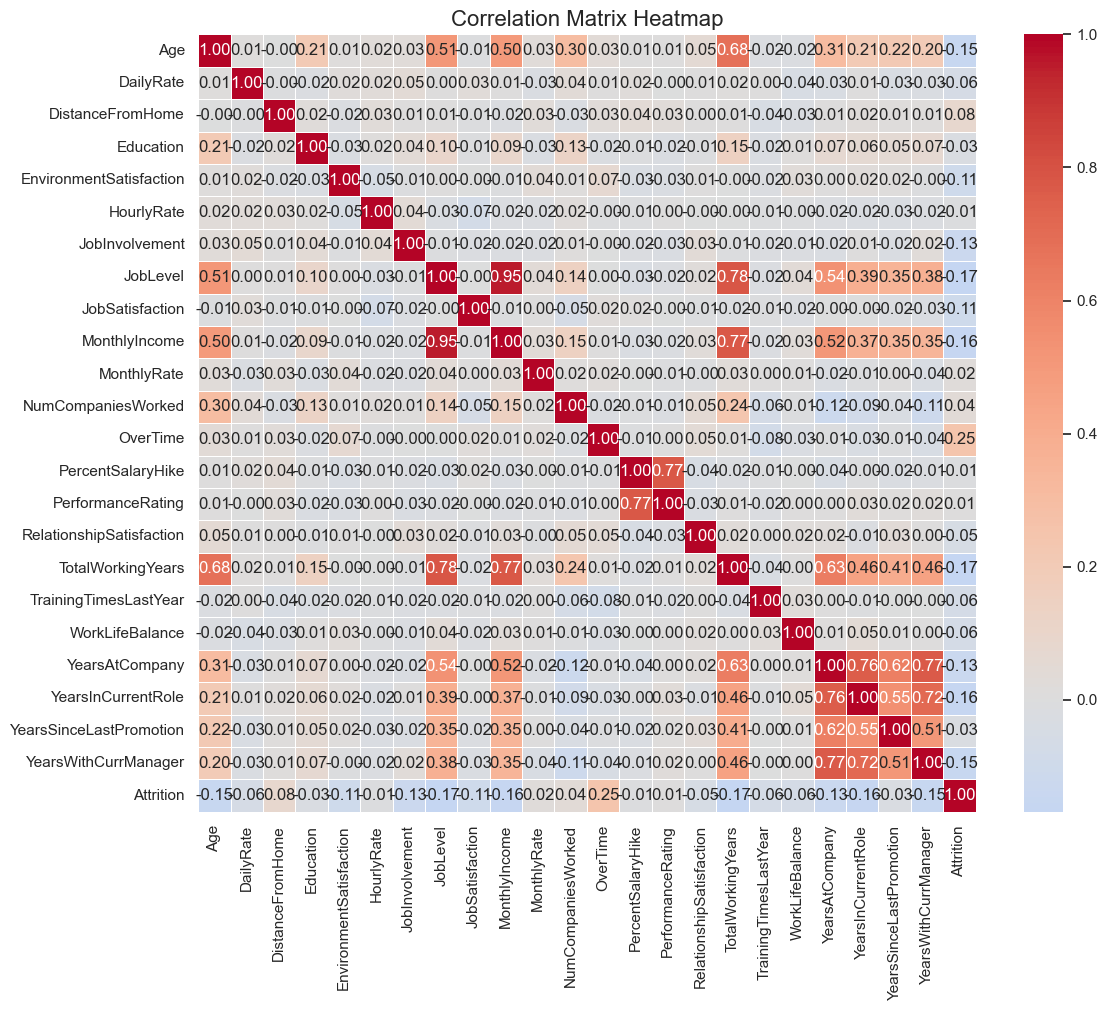

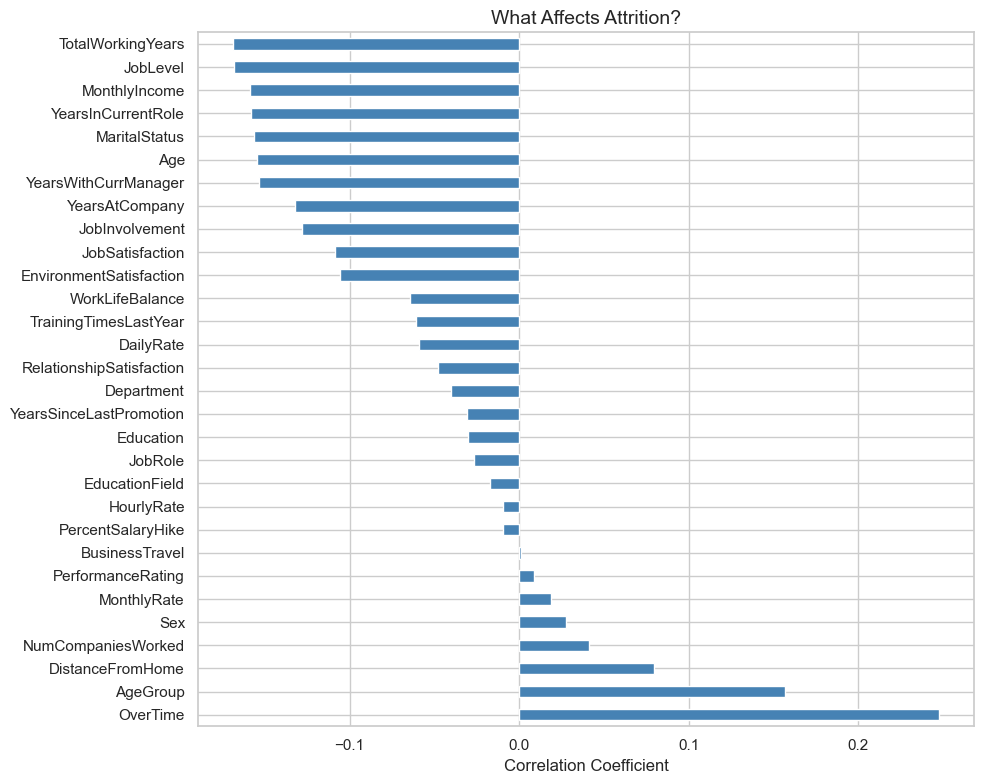

In [23]:
# Quick heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# See what correlates with your target (if applicable)
# For employee attrition, you want to know what causes it
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

target = 'Attrition'  # or whatever your target is
correlations = df_encoded.corr()[target].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlations.drop(target).plot(kind='barh', color='steelblue')
plt.title(f'What Affects {target}?', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [24]:
# Create a comprehensive summary
summary = pd.DataFrame({
    'Variable': numeric_df.columns,
    'Min': numeric_df.min(),
    'Max': numeric_df.max(),
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Std Dev': numeric_df.std(),
    'Range': numeric_df.max() - numeric_df.min()
})

summary = summary.reset_index(drop=True)
print("\nNumeric Variables Summary:")
print(summary.to_string(index=False))


Numeric Variables Summary:
                Variable    Min     Max         Mean  Median     Std Dev   Range
                     Age   21.0    60.0    36.982982    36.0    9.035224    39.0
               DailyRate  102.0  1499.0   802.051736   802.0  403.303189  1397.0
        DistanceFromHome   -0.5    29.0     9.192308     7.0    8.111196    29.5
               Education    1.0     5.0     2.913887     3.0    1.024016     4.0
 EnvironmentSatisfaction    1.0     4.0     2.722260     3.0    1.093292     3.0
              HourlyRate   30.0   100.0    65.898570    66.0   20.334363    70.0
          JobInvolvement    1.0     4.0     2.729748     3.0    0.711769     3.0
                JobLevel    1.0     5.0     2.064670     2.0    1.106968     4.0
         JobSatisfaction    1.0     4.0     2.727025     3.0    1.104097     3.0
           MonthlyIncome 1009.0 19999.0  6503.428182  4908.0 4709.742183 18990.0
             MonthlyRate 2094.0 26999.0 14322.938053 14255.0 7114.818607 24905.0


In [25]:
# Show initial row count
print(f"Initial number of rows: {len(df)}")

# Check for negative values in DistanceFromHome
print(f"\nNumber of rows with negative DistanceFromHome: {(df['DistanceFromHome'] < 0).sum()}")

# Remove rows with negative DistanceFromHome values
df_cleaned = df[df['DistanceFromHome'] >= 0]

# Show remaining row count
print(f"Rows after removing negative values: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")

# Verify no negative values remain
print(f"\nVerification - Negative values remaining: {(df_cleaned['DistanceFromHome'] < 0).sum()}")

# Display some statistics
print(f"\nDistanceFromHome after cleaning:")
print(f"  Min: {df_cleaned['DistanceFromHome'].min()}")
print(f"  Max: {df_cleaned['DistanceFromHome'].max()}")

Initial number of rows: 1469

Number of rows with negative DistanceFromHome: 1
Rows after removing negative values: 1468
Rows removed: 1

Verification - Negative values remaining: 0

DistanceFromHome after cleaning:
  Min: 1.0
  Max: 29.0


In [26]:
# EXPORT THE CLEANED CSV FILE
df_cleaned.to_csv('EmployeeAttritionFPD_cleaned.csv', index=False)
print("\n✓ CSV file exported successfully!")


✓ CSV file exported successfully!
